In [3]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt

In [58]:
X_df = pd.read_csv('C:\\Users\\Krishna\\IIT MADRAS\\PRML\\Assignment 2\\A2Data_train.csv',header = None)

y_train = np.array(X_df.iloc[:,-1]).reshape(10000,1)
X_train = np.array(X_df.iloc[:,:-1].T)

## i

In [59]:
cov = X_train@X_train.T
inv_cov = np.linalg.inv(cov)
w_ml = (inv_cov)@(X_train)@(y_train)
print(w_ml)

[[-7.84961009e-03]
 [-1.36715320e-02]
 [-3.61656438e-03]
 [ 2.64909160e-03]
 [ 1.88551446e-01]
 [ 2.65314657e-03]
 [ 9.46531786e-03]
 [ 1.79809481e-01]
 [ 3.73757317e-03]
 [ 4.99608944e-01]
 [ 8.35836265e-03]
 [ 4.29108775e-03]
 [ 1.42141179e-02]
 [ 3.94232414e-03]
 [ 9.36795890e-03]
 [-1.12038274e-03]
 [ 3.35727500e-03]
 [ 1.16152212e-03]
 [-9.40884707e-03]
 [-2.45575476e-03]
 [-1.17409629e-02]
 [-1.01960612e-02]
 [ 7.95771321e-03]
 [-1.00574854e-02]
 [ 6.04882939e-03]
 [-4.67345192e-03]
 [-3.09091547e-03]
 [ 8.14909193e-03]
 [ 1.20264599e-02]
 [-6.82458163e-03]
 [-8.65405539e-03]
 [ 9.86273479e-04]
 [ 4.92968011e-03]
 [ 5.99772461e-03]
 [-1.34667860e-02]
 [ 1.07075729e-03]
 [ 1.32745992e-02]
 [-1.14148742e-02]
 [-2.01056697e-02]
 [ 5.85096240e-01]
 [ 4.94483247e-04]
 [-7.86666920e-04]
 [-2.71926574e-03]
 [-9.54021938e-03]
 [-5.44161058e-03]
 [ 9.80679209e-03]
 [-6.72540624e-03]
 [-4.45414276e-04]
 [ 6.98516508e-03]
 [ 3.16138907e-02]
 [ 4.51763485e-01]
 [-8.75221380e-03]
 [ 2.5516739

## ii

In [84]:
def del_f(X, y, w):
    return 2*((X@X.T@w) - (X@y))

def grad_desc(X, y, w_ini, e=1e-5, lr=3e-6, max_iter=1e5):
    w_t = []
    grad = del_f(X,y,w_ini)
    w_fin = w_ini
    iter_ = 0
    
    while np.linalg.norm(grad) >= e and iter_ <= max_iter:
        w = w_fin
        w_fin = w - lr*grad
        w_t.append(w_fin)
        grad = del_f(X,y,w_fin)
        iter_ += 1
    
    return w_t

In [85]:
w_ini = np.zeros((100,1))
w_t = grad_desc(X_train, y_train, w_ini)
err = [np.linalg.norm(i - w_ml) for i in w_t]


7.123031631794149e-09 at iteration = 4336


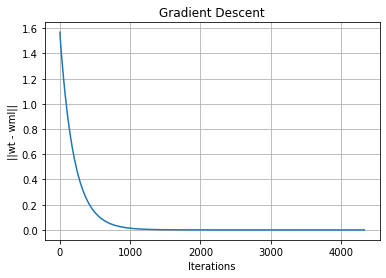

In [86]:
plt.plot(err)
plt.xlabel('Iterations')
plt.ylabel('||wt - wml||')
plt.grid('on')
plt.title('Gradient Descent')
print(err[-1],'at iteration =',len(err))
plt.show()

In [89]:
def loss(X, y, w):
    return np.linalg.norm(X.T@w - y)**2

print(loss(X_train, y_train, w_ml))
print(loss(X_train, y_train, w_t[-1]))

396.8644186272515
396.86441862725167


## iii

In [90]:
def del_f(X, y, w):
    return 2*((X@X.T@w) - (X@y))

def stoch_grad_desc(X, y, w_ini, e=1e-5, lr=2e-4, max_iter=1e5):
    err = []
    idx_batch = random.sample(list(range(10000)),100)
    X_batch = X[:,idx_batch]
    y_batch = y[idx_batch]
    grad = del_f(X_batch,y_batch,w_ini)
    w_fin = w_ini
    ite = 1
    w_sgd = np.zeros((X.shape[0],1))
    
    while np.linalg.norm(grad) >= e and ite <= max_iter:
        w_fin = w_fin - lr*grad
        w_sgd = (w_sgd*(ite-1) + w_fin)/ite
        err.append(np.linalg.norm(w_sgd-w_ml))
        idx_batch = random.sample(list(range(10000)),100)
        X_batch = X[:,idx_batch]
        y_batch = y[idx_batch]
        grad = del_f(X_batch,y_batch,w_fin)
        ite += 1
    
    return err,w_sgd

In [92]:
w_ini = np.zeros((100,1))
err_stoc,w_sgd = stoch_grad_desc(X_train, y_train, w_ini)

0.005467313880430703 at iteration = 100000


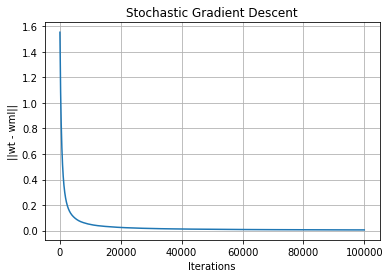

In [93]:
plt.plot(err_stoc)
plt.xlabel('Iterations')
plt.ylabel('||wt - wml||')
plt.grid('on')
plt.title('Stochastic Gradient Descent')
print(err_stoc[-1],'at iteration =',len(err_stoc))
plt.show()

In [94]:
loss(X_train, y_train, w_sgd)

396.8886025212374